In [333]:
import pandas as pd

Задание 1

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [413]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


Задание 2

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [414]:
data.isna().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

In [415]:
for i in data.columns:
    print(i, ':', data[i].unique().shape[0], end='\n\t')
    if data[i].dtype not in ('int64', 'float64'):
        print(data[i].unique())
    print('Type:',data[i].dtype)
    print()

status : 4
	['no checking account' '... < 0 DM'
 '... >= 200 DM / salary for at least 1 year' '0<= ... < 200 DM']
Type: object

duration : 33
	Type: int64

credit_history : 5
	['all credits at this bank paid back duly'
 'no credits taken/all credits paid back duly'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'critical account/other credits elsewhere']
Type: object

purpose : 10
	['car (used)' 'others' 'retraining' 'furniture/equipment' 'car (new)'
 'business' 'domestic appliances' 'radio/television' 'repairs' 'vacation']
Type: object

amount : 923
	Type: int64

savings : 5
	['unknown/no savings account' '... <  100 DM' '100 <= ... <  500 DM'
 '... >= 1000 DM' '500 <= ... < 1000 DM']
Type: object

employment_duration : 5
	['< 1 yr' '1 <= ... < 4 yrs' '4 <= ... < 7 yrs' 'unemployed' '>= 7 yrs']
Type: object

installment_rate : 4
	['< 20' '25 <= ... < 35' '20 <= ... < 25' '>= 35']
Type: object

personal_status_sex : 4
	['female : non-single or male : si

Пропусков в данных нет.

Количественные признаки: duration, age, amount;

Бинарные признак:credit_risk, foreign_worker, telephone;

Котигориальные признаки: job, housing, other_installment_plans, property, personal_status_sex, purpose, credit_history, other_debtors, employment_duration;

Порядковые признаки: installment_rate, present_residence, people_liable, number_credits, status, savings

Задание 3

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [416]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

Задание 4

Какой процент клиентов моложе 30 лет снимает жилье? А какой процент клиентов старше 40 лет снимает жилье?

In [417]:
print('Процент клиентов моложе 30 лет, которые снимают жилье: ',
      data[(data['age'] < 30) & (data['housing'] == 'rent')].shape[0] * 100 / data[data['age'] < 30].shape[0], '%', sep='')
print('Процент клиентов старше 40 лет, которые снимают жилье: ',
     data[(data['age'] > 40) & (data['housing'] == 'rent')].shape[0] * 100 / data[data['age'] > 40].shape[0], '%', sep='')

Процент клиентов моложе 30 лет, которые снимают жилье: 66.66666666666667%
Процент клиентов старше 40 лет, которые снимают жилье: 68.01470588235294%


Задание 5

У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [418]:
print('Кличество иностранцев у которых число кредитов больше 3:',
     data[(data['foreign_worker'] == 'yes') & (data['number_credits'] > '3')].shape[0])

Кличество иностранцев у которых число кредитов больше 3: 1


In [419]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Задание 6

Используя numpy и matplotlib, начнём с тренировки: постройте график функций sin(x) и cos(x)  от -pi до pi из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

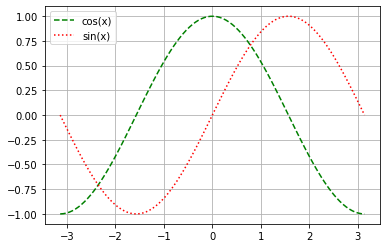

In [420]:
x = np.linspace(-np.pi, np.pi, num=100)
y_cos = np.cos(x)
y_sin = np.sin(x)
plt.plot(x, y_cos, '--g', label='cos(x)')
plt.plot(x, y_sin, ':r', label='sin(x)')
plt.legend()
plt.grid()

Задание 7

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

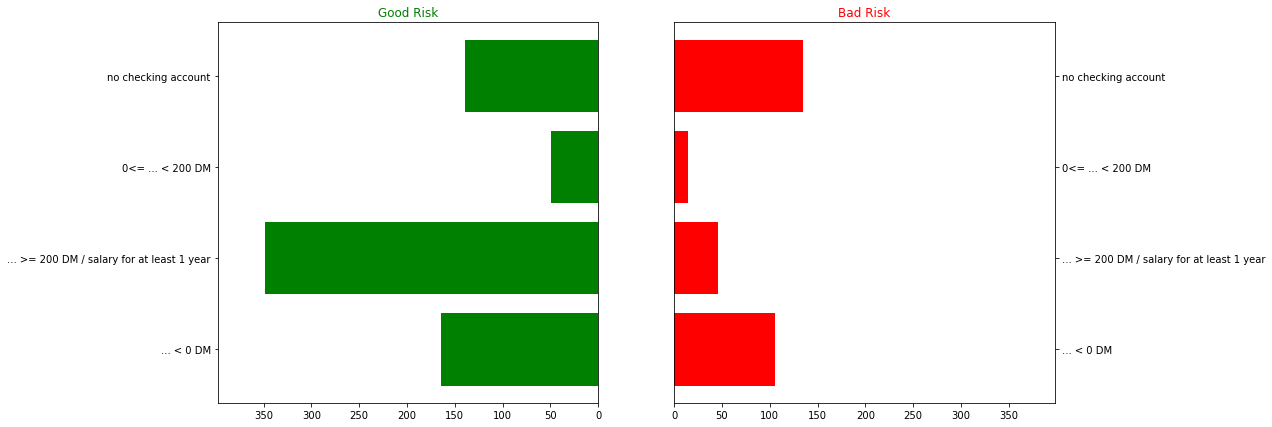

In [421]:
df_good = data[data.credit_risk == 'good'].groupby('status')['credit_risk'].count()
y = np.array(df_good.index)
x1 = df_good.values
df_bad = data[data.credit_risk == 'bad'].groupby('status')['credit_risk'].count()
x2 = df_bad.values

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].set_xlim([0, max(x1.max(), x2.max()) + 50])
ax[1].set_xlim([0, max(x1.max(), x2.max()) + 50])
ax[0].set_title('Good Risk', color='g')
ax[1].set_title('Bad Risk', color='r')
ax[0].barh(y, x1, color='g')
ax[1].barh(y, x2, color='r')
ax[0].invert_xaxis()
ax[1].yaxis.tick_right()

Задание 8

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

In [422]:
import seaborn as sns

Text(0.5, 1.0, 'savings - credit_risk')

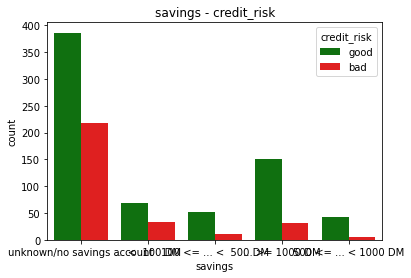

In [423]:
sns.countplot(x='savings', data=data, hue='credit_risk', palette=['g', 'r'])
plt.title('savings - credit_risk')

Задание 9

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

<AxesSubplot:xlabel='savings', ylabel='age'>

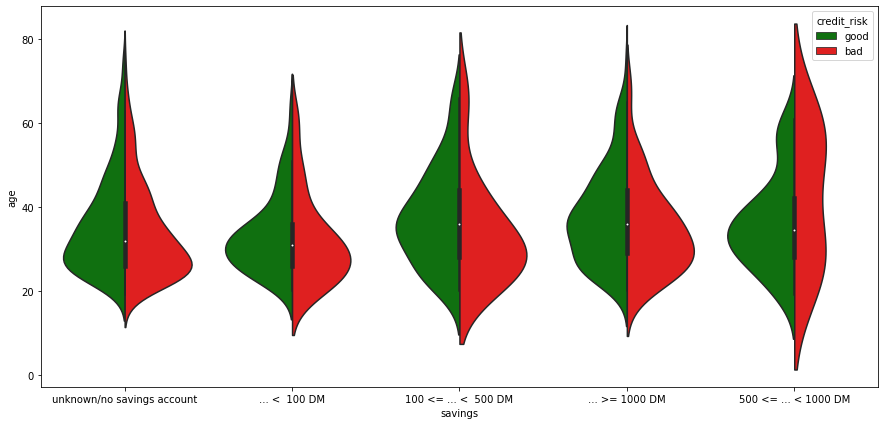

In [424]:
plt.figure(figsize=(15, 7))
sns.violinplot(x='savings', y='age', hue='credit_risk', data=data, palette=['g', 'r'], split=True)

Задание 10

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

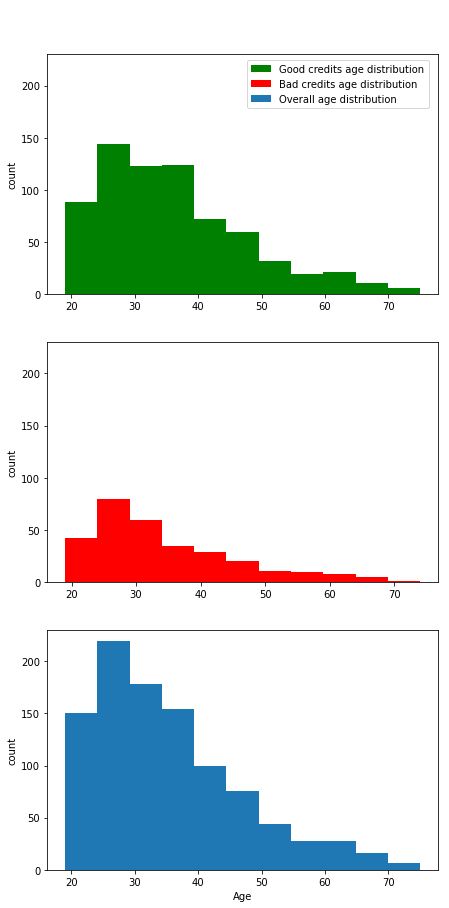

In [425]:
fig, ax = plt.subplots(3, 1, figsize=(7, 15))
ax[0].hist(np.array(data[data['credit_risk'] == 'good']['age']), bins=11, color='g')
ax[1].hist(data[data['credit_risk'] == 'bad']['age'], bins=11, color='r')
ax[2].hist(np.array(data['age']), bins=11)
ax[0].set_ylim([0, 230])
ax[1].set_ylim([0, 230])
ax[2].set_ylim([0, 230])
ax[0].set_ylabel('count')
ax[1].set_ylabel('count')
ax[2].set_ylabel('count')
ax[2].set_xlabel('Age')
fig.legend(['Good credits age distribution', 'Bad credits age distribution', 'Overall age distribution'], loc=(0.55, 0.88))

Задание 11

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами

Text(0, 0.5, 'Duration')

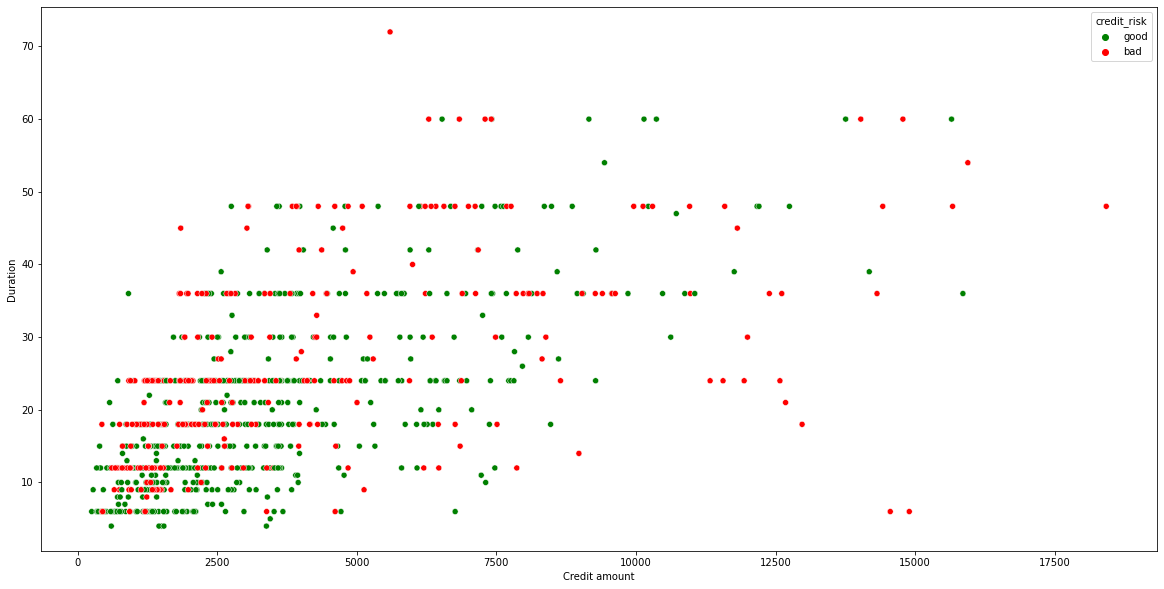

In [426]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='amount', y='duration', hue='credit_risk', data=data, palette=['g', 'r'])
plt.xlabel('Credit amount')
plt.ylabel('Duration')

Задание 12

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

Text(0.5, 0, 'Age')

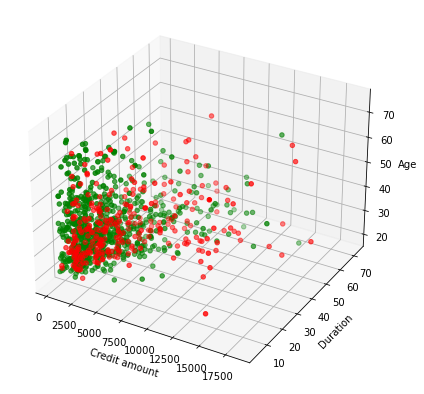

In [427]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(projection = '3d')
ax.scatter(data[data['credit_risk'] == 'good']['amount'],
           data[data['credit_risk'] == 'good']['duration'],
           data[data['credit_risk'] == 'good']['age'], color='g')
ax.scatter(data[data['credit_risk'] == 'bad']['amount'],
           data[data['credit_risk'] == 'bad']['duration'],
           data[data['credit_risk'] == 'bad']['age'], color='r')
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

Задание 13

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [428]:
#Обрабатываем порядковые признаки
lst = ['credit_risk', 
       'foreign_worker', 
       'telephone',  
       'people_liable', 
       'number_credits']
for i in lst:
    dct = dict()
    n = 0
    features = data[i].unique()
    features.sort()
    for j in features:
        dct[j] = n
        n += 1
    print('Словарь со старыми и новыми уникальными значениями признака', i + ':', dct)
    data[i] = data[i].map(dct)
dct = {'< 20': 0, '20 <= ... < 25': 1, '25 <= ... < 35': 2, '>= 35': 3}
data['installment_rate'] = data['installment_rate'].map(dct)
print('Словарь со старыми и новыми уникальными значениями признака installment_rate:', dct)
dct = {'< 1 yr': 0, '1 <= ... < 4 yrs': 1, '4 <= ... < 7 yrs': 2, '>= 7 yrs': 3}
data['present_residence'] = data['present_residence'].map(dct)
print('Словарь со старыми и новыми уникальными значениями признака present_residence:', dct)
dct = {'no checking account': 0, '... < 0 DM': 1 ,'0<= ... < 200 DM': 2, '... >= 200 DM / salary for at least 1 year': 3}
data['status'] = data['status'].map(dct)
print('Словарь со старыми и новыми уникальными значениями признака status:', dct)
dct = {'unknown/no savings account': 0, '... <  100 DM': 1, '100 <= ... <  500 DM': 2,
       '500 <= ... < 1000 DM': 3, '... >= 1000 DM': 4}
data['savings'] = data['savings'].map(dct)
print('Словарь со старыми и новыми уникальными значениями признака savings:', dct)

Словарь со старыми и новыми уникальными значениями признака credit_risk: {'bad': 0, 'good': 1}
Словарь со старыми и новыми уникальными значениями признака foreign_worker: {'no': 0, 'yes': 1}
Словарь со старыми и новыми уникальными значениями признака telephone: {'no': 0, 'yes (under customer name)': 1}
Словарь со старыми и новыми уникальными значениями признака people_liable: {'0 to 2': 0, '3 or more': 1}
Словарь со старыми и новыми уникальными значениями признака number_credits: {'1': 0, '2-3': 1, '4-5': 2, '>= 6': 3}
Словарь со старыми и новыми уникальными значениями признака installment_rate: {'< 20': 0, '20 <= ... < 25': 1, '25 <= ... < 35': 2, '>= 35': 3}
Словарь со старыми и новыми уникальными значениями признака present_residence: {'< 1 yr': 0, '1 <= ... < 4 yrs': 1, '4 <= ... < 7 yrs': 2, '>= 7 yrs': 3}
Словарь со старыми и новыми уникальными значениями признака status: {'no checking account': 0, '... < 0 DM': 1, '0<= ... < 200 DM': 2, '... >= 200 DM / salary for at least 1 yea

Задание 14

In [429]:
#Обработка категориальных признаков
data['job'] = data['job'].apply(func=lambda x: 0 if x == 'unemployed/unskilled - non-resident' else 1)
data['number_credits'] = data.apply(func=lambda x: x['number_credits'] + 1 if (x['other_installment_plans'] != 'none' 
                                                      and x['number_credits'] != 3) else x['number_credits'], axis=1)
data['personal_status_sex'] = data['personal_status_sex'].apply(func=lambda x: 1 if x in ('male : married/widowed',
                                                                                          'female : single') else 0)
data['purpose'] = data['purpose'].apply(func=lambda x: 1 if x in ('furniture/equipment', 'car (new)') else 0)
def func(x):
    if x == 'all credits at this bank paid back duly':
        return 1
    elif x in ('no credits taken/all credits paid back duly', 'existing credits paid back duly till now'):
        return 0.5
    return 0
data['credit_history'] = data['credit_history'].apply(func=func)
data['other_debtors'] = data['other_debtors'].apply(func=lambda x: 1 if x == 'guarantor' else 0)
data.drop(columns=['housing', 'property', 'employment_duration', 'other_installment_plans'], inplace=True)
print(data)

     status  duration  credit_history  purpose  amount  savings  \
0         0        18             1.0        0    1049        0   
1         0         9             1.0        0    2799        0   
2         1        12             0.5        0     841        1   
3         0        12             1.0        0    2122        0   
4         0        12             1.0        0    2171        0   
..      ...       ...             ...      ...     ...      ...   
995       0        24             0.5        1    1987        0   
996       0        24             0.5        0    2303        0   
997       3        21             1.0        0   12680        4   
998       1        12             0.5        1    6468        4   
999       0        30             0.5        0    6350        4   

     installment_rate  personal_status_sex  other_debtors  present_residence  \
0                   0                    0              0                  3   
1                   2              

<AxesSubplot:>

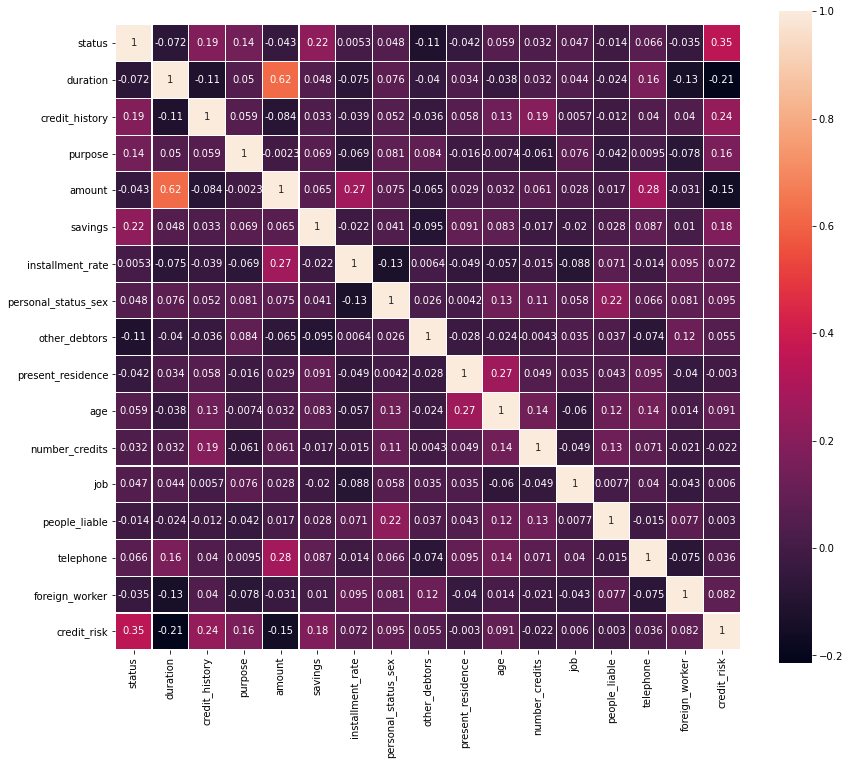

In [430]:
plt.figure(figsize = (14, 12))
sns.heatmap(data.corr(), linewidths = 0.1, vmax = 1.0, square = True, annot = True)

Наиболее значимые зависимости наблюдаются у status, credit_history, purpose, savings. Подберём наиболее подходящие веса для данных значений(все остальные веса поставим в значение 0.01):

In [431]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [432]:
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [433]:
def normalize(X: np.array) -> np.array: #функция для нормализации данных
    min_x = np.amin(X, axis = 0)
    max_x = np.amax(X, axis = 0)
    return (X - min_x) / (max_x - min_x)

def fit(X_train, y_train): #функция для подбора весов
    weigths = np.arange(0, 1, 0.03)
    for i1 in weigths:
        for i3 in weigths:
            for i4 in weigths:
                for i6 in weigths:
                    arr = np.array([i1, 0.01, i3, i4, 0.01,
                                    i6, 0.01, 0.01, 0.01, 0.01,
                                    0.01, 0.01, 0.01, 0.01, 0.01, 0.01])
                    if accuracy_score(y_train, np.around(X_train @ arr)) >= 0.74:
                        return arr
X_train = normalize(X_train)
X_test = normalize(X_test)

In [434]:
def predict(Xtest: np.array) -> np.array:
    
    return np.around(Xtest @ fit(X_train, y_train))

X_train = normalize(X_train)
X_test = normalize(X_test)

accuracy_score(y_test, predict(X_test))

0.712